In [ ]:
import numpy as np

#Task 1:
def getArtificialData(mean, cov, nx, nt):
    x = np.random.multivariate_normal(mean, cov, nx)
    t = np.random.multivariate_normal(mean, cov, nt)

    su=0 # finding mu
    for i in x:
      su=su+i
    mu=su/(len(x))


    nnc = nx # finding variance
    Sgm = np.dot((x-mu).T, x-mu) / nnc

    return x, t, mu, Sgm

# Task 2:

def evaluateMultiVarGauss(t, mu, Sgm):
    d = t.shape[0] # dimension d
    coefficient = 1 / np.sqrt((2 * np.pi) ** d * np.linalg.det(Sgm))
    exponent = -0.5 * np.sum(np.dot((t - mu), np.linalg.inv(Sgm)) * (t - mu), axis=1)
    return coefficient * np.exp(exponent)



# Task 3:

def calculateTestSet(t, pXY, yEx):
    num_points = t.shape[0]
    num_classes = pXY.shape[1]


    posterior = pXY / np.sum(pXY, axis=1, keepdims=True)

    misclass = 0
    for i in range(num_points):
        print("At Test Point: ", i+1)
        print("Probabilities of three classes : ", pXY[i])
        print("True Label: ", yEx[i])
        #  Bayes' rule
        predicted_label = np.argmax(posterior[i])
        print("Predicted Label:", predicted_label)
        print("..............................................................................................................")

        if predicted_label != yEx[i]:
            misclass += 1
        print()
    print("//////////////////////////////////////")
    print("Misclassified Points:", misclass)
    print("//////////////////////////////////////")




mean_c0 = [0, 0]
cov_c0 = [[2, 1], [1, 50]]
nx_c0 = 40
nt_c0 = 10

mean_c1 = [7, 5]
cov_c1 = [[3, 1], [1, 3]]
nx_c1 = 80
nt_c1 = 20

mean_c2 = [-5, 5]
cov_c2 = [[5, 2], [2, 3]]
nx_c2 = 20
nt_c2 = 5

x_c0, t_c0, mu_c0, Sgm_c0 = getArtificialData(mean_c0, cov_c0, nx_c0, nt_c0)
x_c1, t_c1, mu_c1, Sgm_c1 = getArtificialData(mean_c1, cov_c1, nx_c1, nt_c1)
x_c2, t_c2, mu_c2, Sgm_c2 = getArtificialData(mean_c2, cov_c2, nx_c2, nt_c2)

x = np.concatenate((x_c0, x_c1, x_c2))
t = np.concatenate((t_c0, t_c1, t_c2))
y = np.concatenate((np.zeros(nt_c0), np.ones(nt_c1), 2 * np.ones(nt_c2)))

# Test with quadratic decision boundaries
probabilities = []
for mu, Sgm in [(mu_c0, Sgm_c0), (mu_c1, Sgm_c1), (mu_c2, Sgm_c2)]:
    prob = evaluateMultiVarGauss(t, mu, Sgm)
    probabilities.append(prob)
probabilities = np.array(probabilities).T

calculateTestSet(t, probabilities, y)

# handle tied covariances
tied_cov = (nx_c0 * Sgm_c0 + nx_c1 * Sgm_c1 + nx_c2 * Sgm_c2) / (nx_c0 + nx_c1 + nx_c2)
tied_probabilities = []
for mu in [mu_c0, mu_c1, mu_c2]:
    prob = evaluateMultiVarGauss(t, mu, tied_cov)
    tied_probabilities.append(prob)
tied_probabilities = np.array(tied_probabilities).T

calculateTestSet(t, tied_probabilities, y)



At Test Point:  1
Probabilities of three classes :  [7.80742672e-16 5.55574212e-28 1.80698864e-35]
True Label:  0.0
Predicted Label: 0
..............................................................................................................

At Test Point:  2
Probabilities of three classes :  [2.45375876e-16 6.78459061e-30 1.03567482e-32]
True Label:  0.0
Predicted Label: 0
..............................................................................................................

At Test Point:  3
Probabilities of three classes :  [1.03625547e-15 2.08096799e-21 2.52748145e-26]
True Label:  0.0
Predicted Label: 0
..............................................................................................................

At Test Point:  4
Probabilities of three classes :  [6.37621074e-16 1.97867659e-17 1.80826468e-19]
True Label:  0.0
Predicted Label: 0
..............................................................................................................

At Test Poin

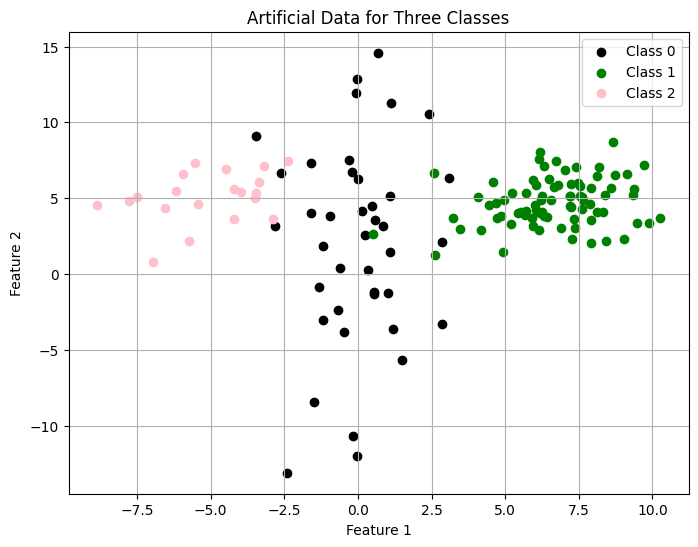

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

plt.scatter(x_c0[:, 0], x_c0[:, 1], color='black', label='Class 0')
plt.scatter(x_c1[:, 0], x_c1[:, 1], color='green', label='Class 1')
plt.scatter(x_c2[:, 0], x_c2[:, 1], color='pink', label='Class 2')

plt.title('Artificial Data for Three Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#importing libraries
from sklearn.datasets import load_iris

# for finding mean and variance of data
def compute_sample_stats(data):

    mu = np.mean(data, axis=0)
    Sgm = np.cov(data, rowvar=False)
    return mu, Sgm

# function to get iris data
def getIrisData(n_train, n_test):
    iris = load_iris()
    data = iris.data
    labels = iris.target

# creating  empty list

    x_train = []
    x_test = []
    y_train = []
    y_test = []

# appending list
    for c in range(3):
        indices = np.where(labels == c)[0]
        x_train.extend(data[indices[:n_train]])
        x_test.extend(data[indices[n_train:n_train+n_test]])
        y_train.extend([c] * n_train)
        y_test.extend([c] * n_test)

# converting into nparray
    x_train = np.array(x_train)
    x_test = np.array(x_test)
    y_train = np.array(y_train)
    y_test = np.array(y_test)

    return x_train, x_test, y_train, y_test


n_train = 40
n_test = 10


x_train, x_test, y_train, y_test = getIrisData(n_train, n_test)


# creating mu and sgm
mus = []
Sgms = []
for c in range(3):
    indices = np.where(y_train == c)[0]
    x_c = x_train[indices]
    mu_c, Sgm_c = compute_sample_stats(x_c)
    mus.append(mu_c)
    Sgms.append(Sgm_c)


probabilities = []
for i in range(3):
    prob = evaluateMultiVarGauss(x_test, mus[i], Sgms[i])
    probabilities.append(prob)
probabilities = np.array(probabilities).T





pXY = probabilities / np.sum(probabilities, axis=1)[:, np.newaxis]




predictions = np.argmax(pXY, axis=1)


calculateTestSet(x_test, pXY, y_test)

At Test Point:  1
Probabilities of three classes :  [1.00000000e+00 7.53616315e-24 1.19721709e-36]
True Label:  0
Predicted Label: 0
..............................................................................................................

At Test Point:  2
Probabilities of three classes :  [9.99999999e-01 5.92003584e-10 1.63532584e-23]
True Label:  0
Predicted Label: 0
..............................................................................................................

At Test Point:  3
Probabilities of three classes :  [1.00000000e+00 6.94835316e-20 7.87668757e-30]
True Label:  0
Predicted Label: 0
..............................................................................................................

At Test Point:  4
Probabilities of three classes :  [1.00000000e+00 7.45095414e-16 1.38173153e-26]
True Label:  0
Predicted Label: 0
..............................................................................................................

At Test Point:  5
Pr